### Predictive features are - B, G, and R values (color values) and predictive target is whether the BGR combination is a skin color or not (1 = Skin and 2 = Non-Skin)

### 1- Read data from text file into a DataFrame

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df = pd.read_csv('D:/Py/Sets/skin.txt',delimiter='\t',header=None)

In [3]:
df.head()

,0,1,2,3
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [4]:
df.shape

(245057, 4)

### 2- Do basic preprocessing of the data

In [5]:
#assign better names to columns
colnames = ['B','G','R','Skin']
df.columns = colnames

In [6]:
df.head()

,B,G,R,Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [7]:
#check for null values in the dataframe
df.isnull().sum()

B       0
G       0
R       0
Skin    0
dtype: int64

In [8]:
#check possible values of target variable
df['Skin'].unique()

array([1, 2], dtype=int64)

In [9]:
df['Skin'].value_counts()

2    194198
1     50859
Name: Skin, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016780CFDC08>,
      dtype=object)

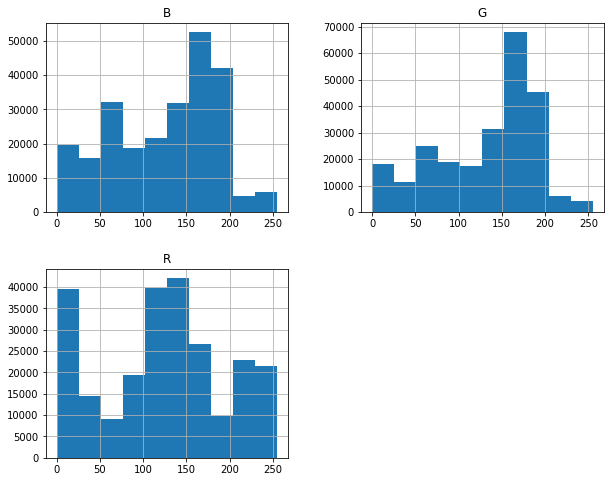

In [10]:
#histograms of the 3 features
df[['B','G','R']].hist(figsize=(10,8))

In [11]:
#check the basic descriptive statistics of the 3 feature variables
df[['B','G','R']].describe()

,B,G,R
count,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151
std,62.255653,59.941197,72.562165
min,0.000000,0.000000,0.000000
25%,68.000000,87.000000,70.000000
50%,139.000000,153.000000,128.000000
75%,176.000000,177.000000,164.000000
max,255.000000,255.000000,255.000000


In [12]:
#check correlation between the 3 variables
df[['B','G','R']].corr()

,B,G,R
B,1.000000,0.855250,0.496376
G,0.855250,1.000000,0.660098
R,0.496376,0.660098,1.000000


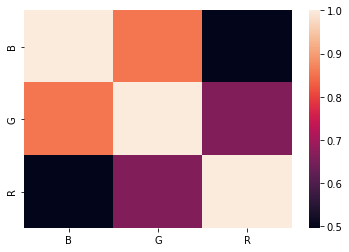

In [13]:
#plot heatmap of the correlation between the features
sns.heatmap(df[['B','G','R']].corr())

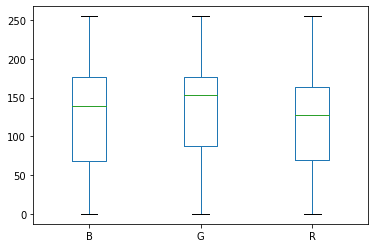

In [14]:
#boxplot the feature variables
df[['B','G','R']].plot(kind='box')

In [15]:
#separate out the feature set (call it X_orig and the target variable as Y)

X_orig = df.drop(columns=['Skin'])
Y = df['Skin']

In [16]:
#standardize the feature set to get it ready for classification and call the set 'X'

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_orig)
X = scaler.transform(X_orig)

X.shape

(245057, 3)

In [17]:
#no need to split dataset into training and test sets because we will be using cross validation which will take care of it

### 3 - Modeling various classifiers

In [51]:
scores = [] #to get all the classifier scores

#### K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#optimize number of neighbors using GridSearchCV and use k-folds cross validation with k=10
from sklearn.model_selection import GridSearchCV

In [35]:
#check neighbors number from 1 to sqrt of sample size as a heuristic

num = int(np.sqrt(X.shape[0]))
nlist=[50,100,150,200,250,300,350,400,450,500]
paramlist = [{'n_neighbors':nlist}]

In [36]:
neigh = KNeighborsClassifier()

In [39]:
#use 10folds cross-val and initialize a gridsearchcv instance

clf = GridSearchCV(neigh,paramlist,cv=5)

In [41]:
#fit the classifier clf to the data
start = time.time()
clf.fit(X,Y)
end = time.time()
print('time taken -->',round((end-start),2),'seconds')

time taken --> 537.58 seconds


In [43]:
clf.best_params_

{'n_neighbors': 50}

In [47]:
clf.best_score_

0.9914020461594786

In [48]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [56]:
scores = []
scores.append(('KNN',clf.best_score_))
scores

[('KNN', 0.9914020461594786)]

#### DecisionTree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
mytree = DecisionTreeClassifier()

In [61]:
mytree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [71]:
#we consider toggling parameters of 'criterion' and 'max_features' and 'max_depth'

critlist = ['gini','entropy']
featlist = ['sqrt','log2',None]
depthlist = [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,None]

paramlist = {'criterion':critlist,'max_features':featlist,'max_depth':depthlist}

In [72]:
clftree = GridSearchCV(mytree,paramlist,cv=5)

In [73]:
#fit the classifier clftree to the data
start = time.time()
clftree.fit(X,Y)
end = time.time()
print('time taken -->',round((end-start),2),'seconds')

time taken --> 144.56 seconds


In [74]:
clftree.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}

In [75]:
clftree.best_score_

0.986370599305982

In [76]:
clftree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
scores.append(('DecTree',clftree.best_score_))

In [78]:
scores

[('KNN', 0.9914020461594786), ('DecTree', 0.986370599305982)]

### Aggregate all the classifier scores together and choose the best classifier

In [98]:
#here best classifier is KNN with parameters as

model = clf.best_estimator_

In [99]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

### Save the model

In [100]:
import pickle

In [105]:
filename = 'D:/Py/skin_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### Load model from disk

In [106]:
# load the model from disk
filename = 'D:/Py/skin_model.pkl'

loaded_model = pickle.load(open(filename, 'rb'))

In [108]:
loaded_model.score(X,Y)

0.9988982155172063

In [122]:
X[245000:245010]

array([[ 0.72177616,  0.60880912, -0.05756663],
       [ 0.73783899,  0.62549217, -0.04378531],
       [ 0.70571332,  0.59212607, -0.07134794],
       [ 0.67358766,  0.55875997, -0.09891057],
       [ 0.641462  ,  0.52539387, -0.1264732 ],
       [ 0.60933634,  0.49202777, -0.15403583],
       [ 0.59327351,  0.47534471, -0.16781715],
       [ 0.59327351,  0.47534471, -0.16781715],
       [ 0.59327351,  0.47534471, -0.16781715],
       [ 0.59327351,  0.47534471, -0.16781715]])

In [123]:
Y[245000:245010].values

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [125]:
loaded_model.predict(X[245000:245010])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)